In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import time
import warnings

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate, RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier, plot_importance

from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the processed dataset.
# semg_df = pd.read_parquet('semg_extracted_features_only/', engine='fastparquet')
semg_df = pd.read_parquet('semg_extracted_more_features_detrended/', engine='fastparquet')


In [3]:
# for x in semg_df.columns:
#     print(x)

In [4]:
# Split the data into features (X) and target (y)
X = semg_df[['semg_1_td_mean', 'semg_2_td_mean', 'semg_3_td_mean', 'semg_4_td_mean', 'semg_5_td_mean', 
            'semg_1_td_rms', 'semg_2_td_rms', 'semg_3_td_rms', 'semg_4_td_rms', 'semg_5_td_rms', 
            'semg_1_td_sd', 'semg_2_td_sd', 'semg_3_td_sd', 'semg_4_td_sd', 'semg_5_td_sd', 
            'semg_1_td_var', 'semg_2_td_var', 'semg_3_td_var', 'semg_4_td_var', 'semg_5_td_var', 
            'semg_1_td_iemg', 'semg_2_td_iemg', 'semg_3_td_iemg', 'semg_4_td_iemg', 'semg_5_td_iemg', 
            'semg_1_td_zcr', 'semg_2_td_zcr', 'semg_3_td_zcr', 'semg_4_td_zcr', 'semg_5_td_zcr', 
            'semg_1_td_ssc', 'semg_2_td_ssc', 'semg_3_td_ssc', 'semg_4_td_ssc', 'semg_5_td_ssc', 
            'semg_1_td_wfl', 'semg_2_td_wfl', 'semg_3_td_wfl', 'semg_4_td_wfl', 'semg_5_td_wfl',
            'semg_1_fd_medfreq', 'semg_1_fd_meanfreq',
            'semg_2_fd_medfreq', 'semg_2_fd_meanfreq',
            'semg_3_fd_medfreq', 'semg_3_fd_meanfreq',
            'semg_4_fd_medfreq', 'semg_4_fd_meanfreq',
            'semg_5_fd_medfreq', 'semg_5_fd_meanfreq',]]
y = semg_df['activity']

# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


Modelling training time: 0.749748945236206 seconds
###### Learning rate:  0.25
Accuracy score (training): 0.845
Accuracy score (testing): 0.585
CROSS VALIDATION SCORES: 
Accuracy Score:  0.6037612693833394
Precision Score:  0.6249301625528958
Recall Score:  0.6042568542568543
F1 Score:  0.5987449213482006


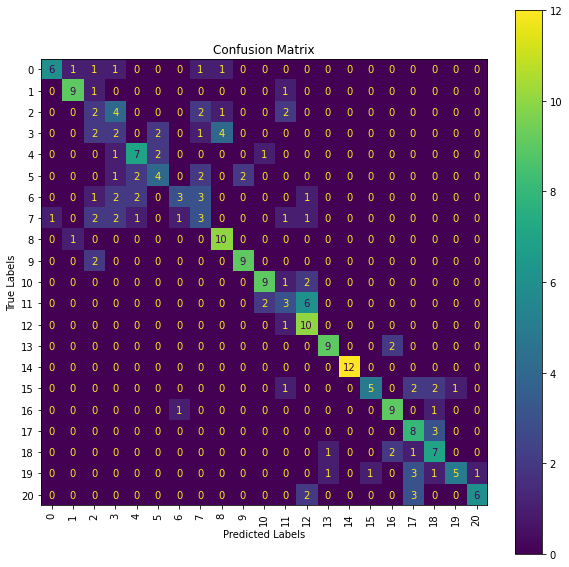

############################




In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train the model for different learning rates and check results:
lr_list = [0.25, 0.5, 0.75, 1]
lr_list = [0.25]
train_accuracy_list = []
test_accuracy_list = []
precision_list = []
f1_list = []
recall_list = []

for learning_rate in lr_list:

    # get the start time
    st = time.time()

    gb_clf = GradientBoostingClassifier(n_estimators=5, learning_rate=learning_rate, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    # get the end time
    et = time.time()

    # get the execution time
    elapsed_time = et - st
    print('Modelling training time:', elapsed_time, 'seconds')

    print("###### Learning rate: ", learning_rate)
    train_accuracy_score = gb_clf.score(X_train, y_train)
    train_accuracy_list.append(train_accuracy_score)
    test_accuracy_score = gb_clf.score(X_test, y_test)
    test_accuracy_list.append(test_accuracy_score)
    print("Accuracy score (training): {0:.3f}".format(train_accuracy_score))
    print("Accuracy score (testing): {0:.3f}".format(test_accuracy_score))

    accuracy_scores = cross_val_score(gb_clf, X, y, cv=5, scoring='accuracy')
    precision_scores = cross_val_score(gb_clf, X, y, cv=5, scoring='precision_macro')
    recall_scores = cross_val_score(gb_clf, X, y, cv=5, scoring='recall_macro')
    f1_scores = cross_val_score(gb_clf, X, y, cv=5, scoring='f1_macro')

    print("CROSS VALIDATION SCORES: ")
    print("Accuracy Score: ", np.mean(accuracy_scores))
    print("Precision Score: ", np.mean(precision_scores))
    precision_list.append(np.mean(precision_scores))
    print("Recall Score: ", np.mean(recall_scores))
    recall_list.append(np.mean(recall_scores))
    print("F1 Score: ", np.mean(f1_scores))
    f1_list.append(np.mean(f1_scores))
    
    # Calculate and print the confusion matrix
    y_test_pred = gb_clf.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    fig, ax = plt.subplots(figsize=(10, 10))
    disp.plot(ax=ax, cmap='viridis', values_format='d')

    # Add titles and labels
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    plt.xticks(rotation=90)
    plt.show()
    print("############################\n\n")

In [9]:
# # Split the data into features (X) and target (y)
# X = semg_df[['semg_1_td_mean', 'semg_2_td_mean', 'semg_3_td_mean', 'semg_4_td_mean', 'semg_5_td_mean', 
#             'semg_1_td_rms', 'semg_2_td_rms', 'semg_3_td_rms', 'semg_4_td_rms', 'semg_5_td_rms', 
#             'semg_1_td_sd', 'semg_2_td_sd', 'semg_3_td_sd', 'semg_4_td_sd', 'semg_5_td_sd', 
#             'semg_1_td_var', 'semg_2_td_var', 'semg_3_td_var', 'semg_4_td_var', 'semg_5_td_var', 
#             'semg_1_td_iemg', 'semg_2_td_iemg', 'semg_3_td_iemg', 'semg_4_td_iemg', 'semg_5_td_iemg', 
#             'semg_1_td_zcr', 'semg_2_td_zcr', 'semg_3_td_zcr', 'semg_4_td_zcr', 'semg_5_td_zcr', 
#             'semg_1_td_ssc', 'semg_2_td_ssc', 'semg_3_td_ssc', 'semg_4_td_ssc', 'semg_5_td_ssc', 
#             'semg_1_td_wfl', 'semg_2_td_wfl', 'semg_3_td_wfl', 'semg_4_td_wfl', 'semg_5_td_wfl',
#             'semg_1_fd_medfreq', 'semg_1_fd_meanfreq',
#             'semg_2_fd_medfreq', 'semg_2_fd_meanfreq',
#             'semg_3_fd_medfreq', 'semg_3_fd_meanfreq',
#             'semg_4_fd_medfreq', 'semg_4_fd_meanfreq',
#             'semg_5_fd_medfreq', 'semg_5_fd_meanfreq',]]
# y = semg_df['activity']

# # standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # perform PCA
# pca = PCA(n_components=0.95)  # keep 99% of variance
# X_pca = pca.fit_transform(X_scaled)

# print(len(X_pca[0]))
# print(X_pca[0])

# # split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)


LR:  0.25
Modelling training time: 0.5719468593597412 seconds
Testing Accuracy Score:  0.7669491525423728
Training Accuracy Score 0.9968085106382979
Testing Precision:  0.7808398522381574
Testing Recall:  0.7669491525423728
Testing F1 Score:  0.767462279174066


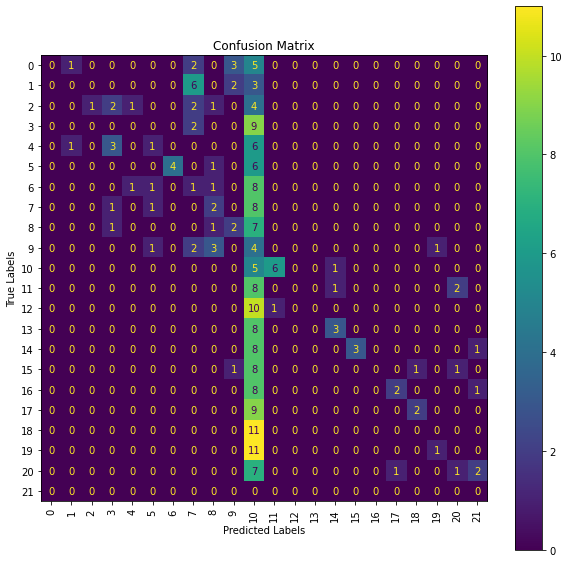

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


############################




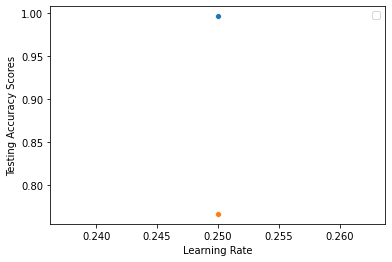

In [11]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
lr_list = [0.25]
train_accuracy_list = []
test_accuracy_list = []

eval_set = [(X_train, y_train - 1), (X_test, y_test - 1)]

for lr in lr_list:
    print("LR: ", lr)
    xgb_clf = XGBClassifier(learning_rate = lr, n_estimators=45, max_depth=2,
#                             subsample=1.0, colsample_bytree=1.0,
#                             gamma=0.2, alpha=0.1, reg_lambda=0.1
                           )
    # get the start time
    st = time.time()

    xgb_clf.fit(X_train, y_train - 1, 
#                 eval_metric="merror", eval_set=eval_set, early_stopping_rounds=5
               )
    # get the end time
    et = time.time()

    # get the execution time
    elapsed_time = et - st
    print('Modelling training time:', elapsed_time, 'seconds')
    
    # Calculate and print accuracy
    test_score = xgb_clf.score(X_test, y_test - 1)
    print("Testing Accuracy Score: ", test_score)
    train_score = xgb_clf.score(X_train, y_train - 1)
    print("Training Accuracy Score", train_score)

    test_accuracy_list.append(test_score)
    train_accuracy_list.append(train_score)

    # Calculate and print precision, recall, and F1 score for test set
    y_test_pred = xgb_clf.predict(X_test)
    test_precision = precision_score(y_test - 1, y_test_pred, average='weighted')
    test_recall = recall_score(y_test - 1, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test - 1, y_test_pred, average='weighted')
    print("Testing Precision: ", test_precision)
    print("Testing Recall: ", test_recall)
    print("Testing F1 Score: ", test_f1)

    
    # Calculate and print the confusion matrix
    y_test_pred = gb_clf.predict(X_test)
    conf_matrix = confusion_matrix(y_test - 1, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    fig, ax = plt.subplots(figsize=(10, 10))
    disp.plot(ax=ax, cmap='viridis', values_format='d')

    # Add titles and labels
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    plt.xticks(rotation=90)
    plt.show()
    print("############################\n\n")

sns.lineplot(x = lr_list, y = train_accuracy_list, marker = 'o')
sns.lineplot(x = lr_list, y = test_accuracy_list, marker = 'o')
plt.xlabel("Learning Rate")
plt.ylabel("Testing Accuracy Scores")
plt.legend()
plt.show()
